In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

In [31]:
def make_model(observed, thrown, n):
    my_model = pm.Model()
    with my_model:
        theta = pm.Beta('theta', n, n)
        likelihood = pm.distributions.discrete.Binomial('likelihood', thrown, theta, observed = observed)
        trace = pm.sample(500)
        
    
    return my_model, trace

def make_predictive_model(observed, thrown, n):
    my_model = pm.Model()
    with my_model:
        theta = pm.Beta('theta', n, n)
        likelihood = pm.distributions.discrete.Binomial('likelihood', thrown, theta, observed = observed)
        pred = pm.distributions.discrete.Binomial('likelihood_pred', 1, theta)
        trace = pm.sample(500)
        
    
    return my_model, trace


# Modelo 1

## 1. Implementacion

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 1681.37it/s]


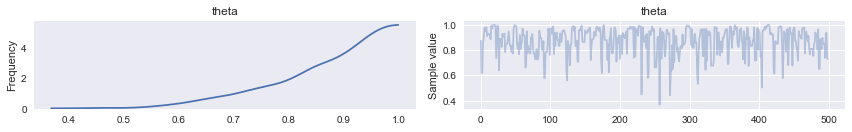

In [21]:
model_1, trace_1 = make_model(6, 6, 1)
pm.traceplot(trace_1)
plt.show()
    

## 2. Resumenes

100%|██████████| 500/500 [00:00<00:00, 3751.79it/s]


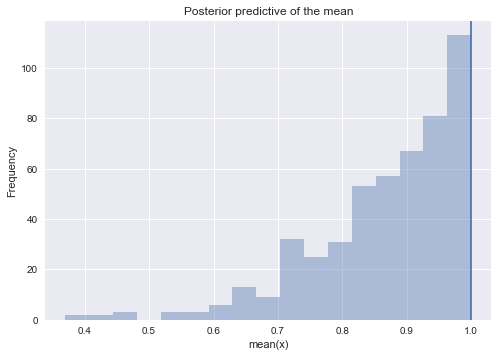

logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 1296.24it/s] 

MAP de modelo 1:  0.9999984620831801


In [26]:
ppc = pm.sample_ppc(trace_1, samples = 500, model = model_1, size =100)
ax = plt.subplot()
sns.distplot([elem.mean()/6 for elem in ppc['likelihood']], kde=False, ax=ax)
ax.axvline(1)
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')
plt.show()
one_map = pm.find_MAP(model=model_1)
print('MAP de modelo 1: ', one_map['theta'])

## 3. Prediccion

Assigned NUTS to theta_logodds__
Assigned Metropolis to likelihood_pred
100%|██████████| 1000/1000 [00:01<00:00, 956.76it/s]


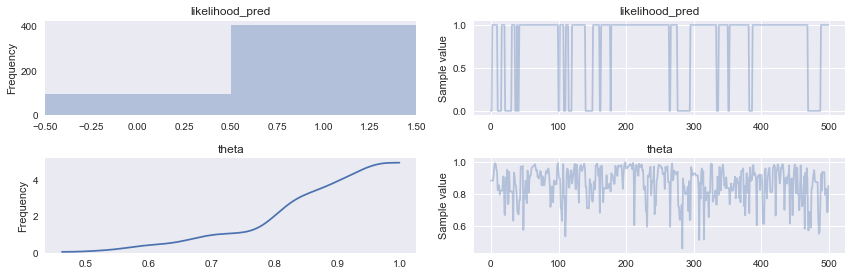

In [32]:
pred_model_1, pred_trace_1 = make_predictive_model(6, 6, 1)


pm.traceplot(pred_trace_1)
plt.show()

## 4. Otros Datos

## 5. Prior

# Modelo 2

## 1. Implementacion

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1000/1000 [00:00<00:00, 2097.83it/s]


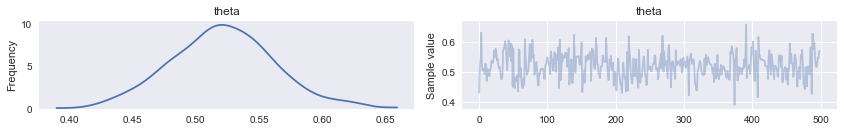

In [22]:
model_2, trace_2 = make_model(6, 6, 63)
pm.traceplot(trace_2)
plt.show()
    

## 2. Resumenes

100%|██████████| 500/500 [00:00<00:00, 3494.04it/s]


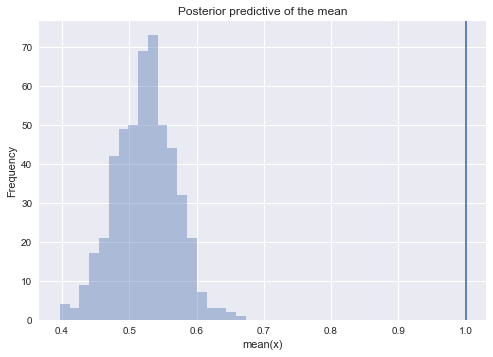

logp = -1.9685, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1979.38it/s]

MAP de modelo 2:  0.5230769230359584


In [27]:
ppc = pm.sample_ppc(trace_2, samples = 500, model = model_2, size =100)
ax = plt.subplot()
sns.distplot([elem.mean()/6 for elem in ppc['likelihood']], kde=False, ax=ax)
ax.axvline(1)
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency')
plt.show()
one_map = pm.find_MAP(model=model_2)
print('MAP de modelo 2: ', one_map['theta'])

## 3. Prediccion

Assigned NUTS to theta_logodds__
Assigned Metropolis to likelihood_pred
100%|██████████| 1000/1000 [00:01<00:00, 968.53it/s]


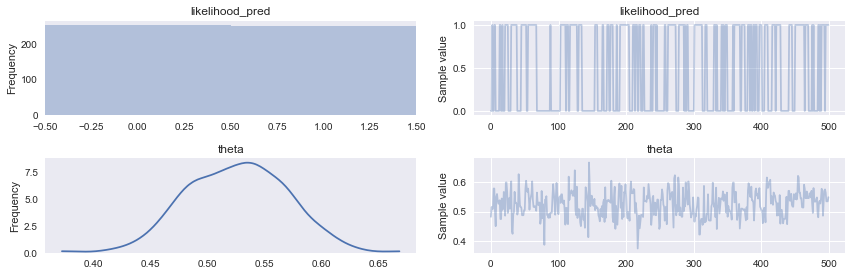

In [34]:
pred_model_2, pred_trace_2 = make_predictive_model(6, 6, 63)


pm.traceplot(pred_trace_2)
plt.show()

## 4. Otros Datos

## 5. Prior